## Problem statment
This notebook analyzes Yammer data to figure out why user engagement number dropped during and after the week of August 1.

Yammer defines engagement as having made some type of server call by interacting with the product (shown in the data as events of type “engagement”). The number of user engagement can be interpreted as “the number of users who logged at least one engagement event during the week starting on that date”. 

## Hypothesis
Checked whether the total number of active new users dropped since August 1st.

Checked the usage count for different event names to see whether they are dropped.

Checked the usage count from different device.

Checked the different email actionss to see whether can find decrease.

In [1]:
import pandas as pd
emails_data=pd.read_csv('yammer_emails.csv')
events_data=pd.read_csv('yammer_events.csv')
users_data=pd.read_csv('yammer_users.csv')
#dims_data = pd.read_csv('dimension_rollup_periods.csv')

Each row of user data frame is showing a unique user_id, what time the user is created and whether the user is activated or not. If the user's state is active, it will have the activated time. If the user's state is pending, it will have NaN as activated time.

In [2]:
users_data.head(50)

,user_id,created_at,company_id,language,activated_at,state
0,0,2013-01-01 20:59:39,5737,english,2013-01-01 21:01:07,active
1,1,2013-01-01 13:07:46,28,english,NaN,pending
2,2,2013-01-01 10:59:05,51,english,NaN,pending
3,3,2013-01-01 18:40:36,2800,german,2013-01-01 18:42:02,active
4,4,2013-01-01 14:37:51,5110,indian,2013-01-01 14:39:05,active
5,5,2013-01-01 13:39:51,2463,spanish,NaN,pending
6,6,2013-01-01 18:37:27,11699,english,2013-01-01 18:38:45,active
7,7,2013-01-01 16:19:01,4765,french,2013-01-01 16:20:28,active
8,8,2013-01-01 4:38:30,2698,french,2013-01-01 4:40:10,active
9,9,2013-01-01 8:04:17,1,french,NaN,pending


In [3]:
users_data['state'].value_counts()

pending    9685
active     9381
Name: state, dtype: int64

In [4]:
users_data['language'].value_counts()

english      9585
spanish      1771
french       1522
japanese     1324
german       1067
arabic        768
chinese       685
indian        583
russian       561
portugese     510
italian       420
korean        270
Name: language, dtype: int64

In [5]:
users_data.dtypes

user_id          int64
created_at      object
company_id       int64
language        object
activated_at    object
state           object
dtype: object

In [6]:
users_data['created_at'] = pd.to_datetime(users_data['created_at'])
user_ct = users_data.groupby(users_data.created_at.dt.date).count()[["user_id", "activated_at"]]
user_ct.reset_index(inplace=True)

In [7]:
user_ct

,created_at,user_id,activated_at
0,2013-01-01,13,7
1,2013-01-02,11,7
2,2013-01-03,14,6
3,2013-01-04,11,1
4,2013-01-05,3,2
...,...,...,...
603,2014-08-27,90,48
604,2014-08-28,95,50
605,2014-08-29,97,45
606,2014-08-30,26,12


In [8]:
user_ct['created_at'] = pd.to_datetime(user_ct['created_at'])
user_ct = user_ct.loc[(user_ct['created_at'] >= '2014-5-1') & (user_ct['created_at'] <= '2014-8-31')]

In [9]:
user_ct

,created_at,user_id,activated_at
485,2014-05-01,73,34
486,2014-05-02,57,30
487,2014-05-03,19,8
488,2014-05-04,22,9
489,2014-05-05,58,24
...,...,...,...
603,2014-08-27,90,48
604,2014-08-28,95,50
605,2014-08-29,97,45
606,2014-08-30,26,12


Text(0, 0.5, 'User Count')

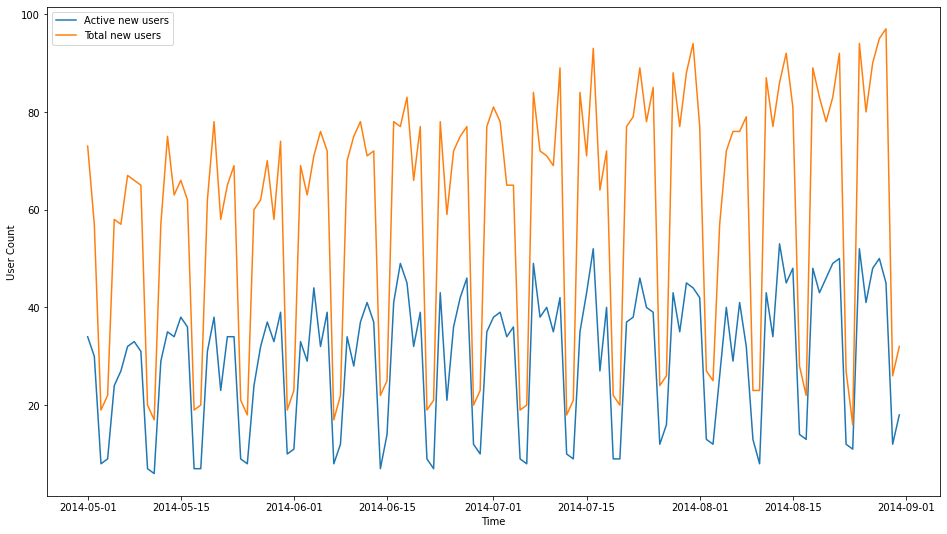

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
sns.lineplot(x=user_ct['created_at'], y=user_ct['activated_at'], label="Active new users")
sns.lineplot(x=user_ct['created_at'], y=user_ct['user_id'], label="Total new users")
plt.xlabel('Time')
plt.ylabel('User Count')

The number of active new users kept the same pattern although it dropped. So this is not the cause for the issue.

Text(0, 0.5, 'User Count')

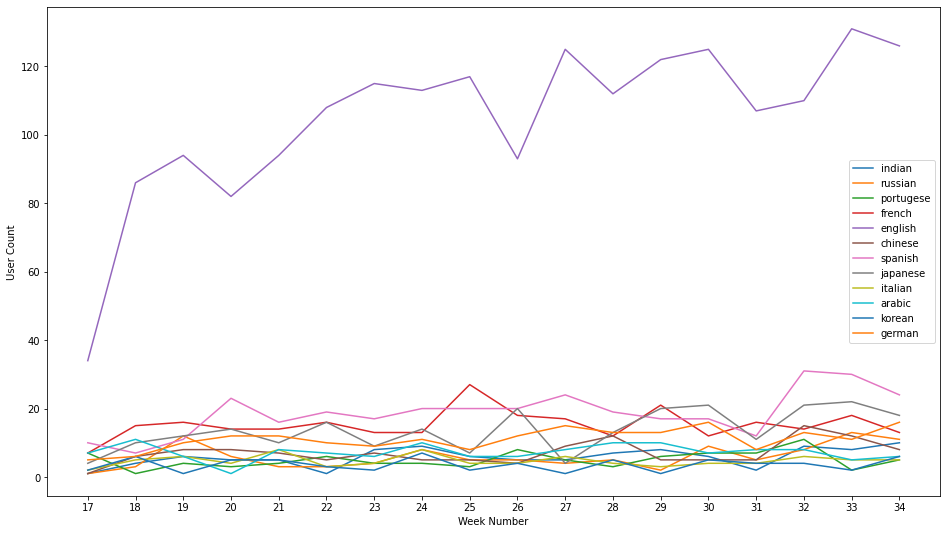

In [32]:
users_data = users_data.loc[(users_data['created_at'] >= '2014-5-1') & (users_data['created_at'] <= '2014-8-31')]
user_languages = set(users_data['language'])

users_data_active = users_data.loc[users_data['state'] == 'active']
plt.figure(figsize=(16, 9))
for language in user_languages:
    users_sub=users_data_active.loc[users_data_active['language'] == language]
    users_ct = users_sub.groupby(users_sub.created_at.dt.strftime('%W')).count()   
    sns.lineplot(x=users_ct.index, y=users_ct['language'], label=language)
#plt.legend(loc='upper left')
plt.xlabel('Week Number')
plt.ylabel('User Count')

The number of active new users in different languages kept the same pattern. So this is also not the cause for the issue.

In [18]:
events_data.head(50)

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0
5,10522,2014-05-02 11:03:43,engagement,search_run,Japan,dell inspiron notebook,3.0
6,10612,2014-05-01 9:59:46,engagement,login,Netherlands,iphone 5,1.0
7,10612,2014-05-01 10:00:18,engagement,like_message,Netherlands,iphone 5,1.0
8,10612,2014-05-01 10:00:53,engagement,send_message,Netherlands,iphone 5,1.0
9,10612,2014-05-01 10:01:24,engagement,home_page,Netherlands,iphone 5,1.0


In [19]:
events_data = events_data.loc[events_data['event_type'] == 'engagement']
events_data.dtypes

user_id          int64
occurred_at     object
event_type      object
event_name      object
location        object
device          object
user_type      float64
dtype: object

In [20]:
events_data['occurred_at'] = pd.to_datetime(events_data['occurred_at'])
events_data = events_data.loc[(events_data['occurred_at'] >= '2014-5-1') & (events_data['occurred_at'] <= '2014-8-31')]

Text(0, 0.5, 'Usage')

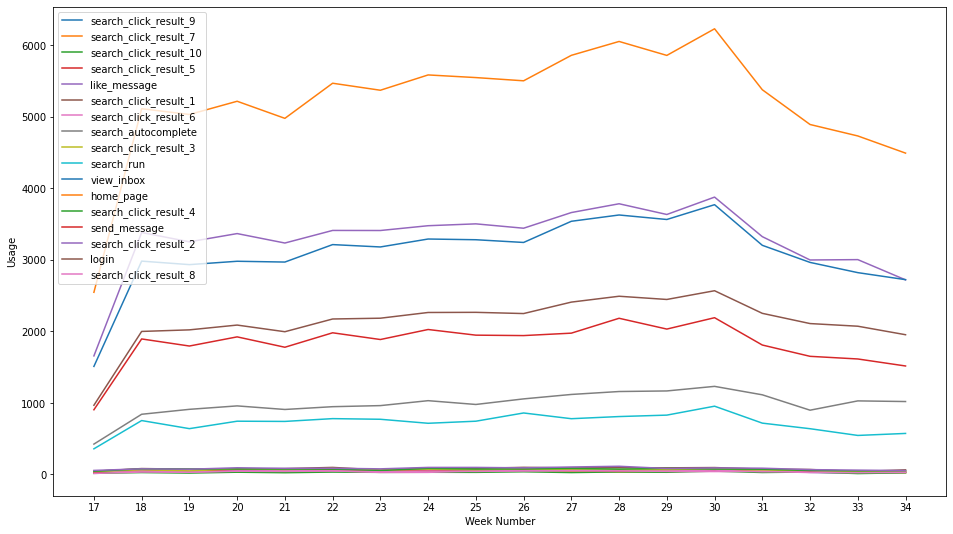

In [21]:
event_names = set(events_data['event_name'])

plt.figure(figsize=(16, 9))
for name in event_names:
    events_sub=events_data.loc[events_data['event_name'] == name]
    event_ct = events_sub.groupby(events_sub.occurred_at.dt.strftime('%W')).count()   
    sns.lineplot(x=event_ct.index, y=event_ct['event_name'], label=name)
plt.legend(loc='upper left')
plt.xlabel('Week Number')
plt.ylabel('Usage')

The usage of function "home page", "like message", "view inbox", "login", "search run", "search click result", "send message" were decreased. Usage dropped in those features can be a reason to cause the issue.

In [22]:
set(events_data['device'])

{'acer aspire desktop',
 'acer aspire notebook',
 'amazon fire phone',
 'asus chromebook',
 'dell inspiron desktop',
 'dell inspiron notebook',
 'hp pavilion desktop',
 'htc one',
 'ipad air',
 'ipad mini',
 'iphone 4s',
 'iphone 5',
 'iphone 5s',
 'kindle fire',
 'lenovo thinkpad',
 'mac mini',
 'macbook air',
 'macbook pro',
 'nexus 10',
 'nexus 5',
 'nexus 7',
 'nokia lumia 635',
 'samsumg galaxy tablet',
 'samsung galaxy note',
 'samsung galaxy s4',
 'windows surface'}

In [23]:
device_dict={}
device_dict['acer aspire notebook']= "PC"
device_dict['acer aspire desktop']="PC"
device_dict['amazon fire phone']="phone"
device_dict['asus chromebook']= "PC"
device_dict['dell inspiron desktop']="PC"
device_dict['dell inspiron notebook'] = "PC"
device_dict['hp pavilion desktop']="PC"
device_dict['htc one']="phone"
device_dict['ipad air']="tablet"
device_dict['ipad mini']="tablet"
device_dict['iphone 4s']="phone"
device_dict['iphone 5']="phone"
device_dict['iphone 5s'] ="phone"
device_dict['kindle fire']="tablet"
device_dict['lenovo thinkpad']= "PC"
device_dict['mac mini']= "PC"
device_dict['macbook air']= "PC"
device_dict['macbook pro']= "PC"
device_dict['nexus 10']="tablet"
device_dict['nexus 7']="phone"
device_dict['nexus 5']="phone"
device_dict['nokia lumia 635']="phone"
device_dict['samsumg galaxy tablet']="tablet"
device_dict['samsung galaxy note']="phone"
device_dict['samsung galaxy s4']="phone"
device_dict['windows surface']="tablet"

In [24]:
events_data = events_data.replace({'device': device_dict}) 

Text(0, 0.5, 'Usage')

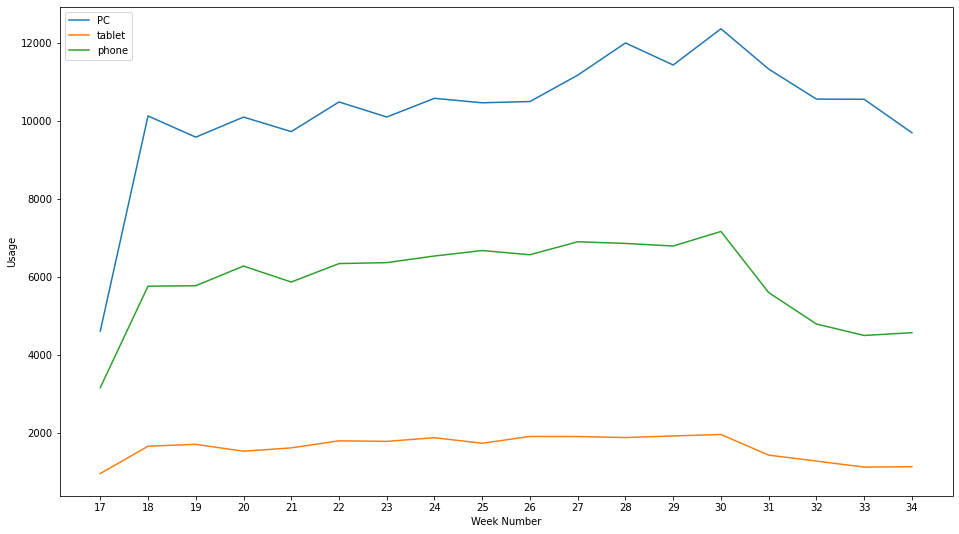

In [25]:
event_devices = set(events_data['device'])

plt.figure(figsize=(16,9))
for device in event_devices:
    events_sub=events_data.loc[events_data['device'] == device]
    event_ct = events_sub.groupby(events_sub.occurred_at.dt.strftime('%W')).count()   
    sns.lineplot(x=event_ct.index, y=event_ct['device'], label=device)
plt.legend(loc='upper left')
plt.xlabel('Week Number')
plt.ylabel('Usage')

Usages from all device types decreased especially from PC and mobile phone. This can be the reason to cause the issue as well.

In [26]:
emails_data.head(50)

,user_id,occurred_at,action,user_type
0,0,2014-05-06 9:30:00,sent_weekly_digest,1
1,0,2014-05-13 9:30:00,sent_weekly_digest,1
2,0,2014-05-20 9:30:00,sent_weekly_digest,1
3,0,2014-05-27 9:30:00,sent_weekly_digest,1
4,0,2014-06-03 9:30:00,sent_weekly_digest,1
5,0,2014-06-03 9:30:25,email_open,1
6,0,2014-06-10 9:30:00,sent_weekly_digest,1
7,0,2014-06-10 9:30:24,email_open,1
8,0,2014-06-17 9:30:00,sent_weekly_digest,1
9,0,2014-06-17 9:30:23,email_open,1


In [27]:
emails_data.dtypes

user_id         int64
occurred_at    object
action         object
user_type       int64
dtype: object

In [28]:
emails_data['occurred_at'] = pd.to_datetime(emails_data['occurred_at'])
emails_data=emails_data.loc[(emails_data['occurred_at'] >= '2014-5-1') & (emails_data['occurred_at'] <= '2014-8-31')]

In [29]:
emails_data.head(50)

,user_id,occurred_at,action,user_type
0,0,2014-05-06 09:30:00,sent_weekly_digest,1
1,0,2014-05-13 09:30:00,sent_weekly_digest,1
2,0,2014-05-20 09:30:00,sent_weekly_digest,1
3,0,2014-05-27 09:30:00,sent_weekly_digest,1
4,0,2014-06-03 09:30:00,sent_weekly_digest,1
5,0,2014-06-03 09:30:25,email_open,1
6,0,2014-06-10 09:30:00,sent_weekly_digest,1
7,0,2014-06-10 09:30:24,email_open,1
8,0,2014-06-17 09:30:00,sent_weekly_digest,1
9,0,2014-06-17 09:30:23,email_open,1


Text(0, 0.5, 'Usage')

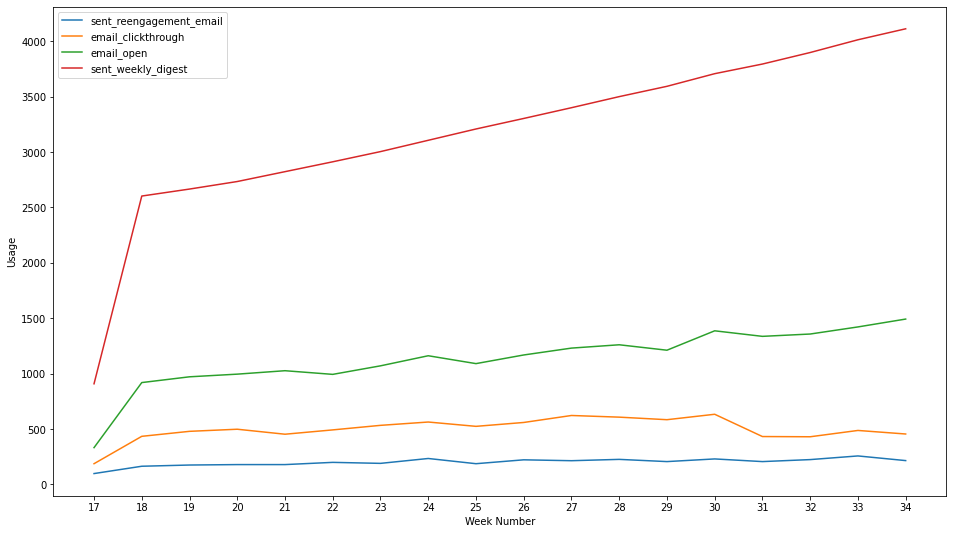

In [30]:
email_actions = set(emails_data['action'])

plt.figure(figsize=(16,9))
for action in email_actions:
    emails_sub=emails_data.loc[emails_data['action'] == action]
    email_ct = emails_sub.groupby(emails_sub.occurred_at.dt.strftime('%W')).count()   
    sns.lineplot(x=email_ct.index, y=email_ct['action'], label=action)
plt.legend(loc='upper left')
plt.xlabel('Week Number')
plt.ylabel('Usage')

Email clichthrough decreased signifcantly from the time period startinng from August 1st. This can be a potential cause as well.